In [1]:
import pandas as pd

In [2]:
df_walmart = pd.read_csv("train.csv")
df_walmart 

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
print(df_walmart.isnull().sum()) #verificando se há valores nulos

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [7]:
duplicadas = df_walmart.duplicated() #verificando se há linhas duplicadas
duplicadas

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Length: 421570, dtype: bool

In [9]:
 df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
df_walmart['Date'] = pd.to_datetime(df_walmart['Date'])

In [13]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [ ]:
Agrupou-se os dados pela coluna Date, Dentro desse agrupamento, selecionou-se apenas a coluna Weekly_Sales 
e somou-se os valores de cada grupo (ou seja, some as vendas da semana)

In [21]:
grupo = df_walmart.groupby('Date')['Weekly_Sales'].sum()

In [23]:
grupo

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

In [57]:
grupo.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Series name: Weekly_Sales
Non-Null Count  Dtype  
--------------  -----  
143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [ ]:
Foi necessário transformar grupo em um data frame, já que ele estava como série e nao havia como utilizá-lo no gráfico

In [59]:
df_grupo = pd.DataFrame(grupo) 

In [61]:
df_grupo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [71]:
df_grupo

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


In [ ]:
As colunas estavam só como indices e não colunas, o que impossibilitava de usar no gráfico, logo teve que ser usado a função reset_index

In [73]:
df_grupo = grupo.reset_index()

In [75]:
df_grupo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [77]:
import matplotlib.pyplot as plt
import plotly.express as px

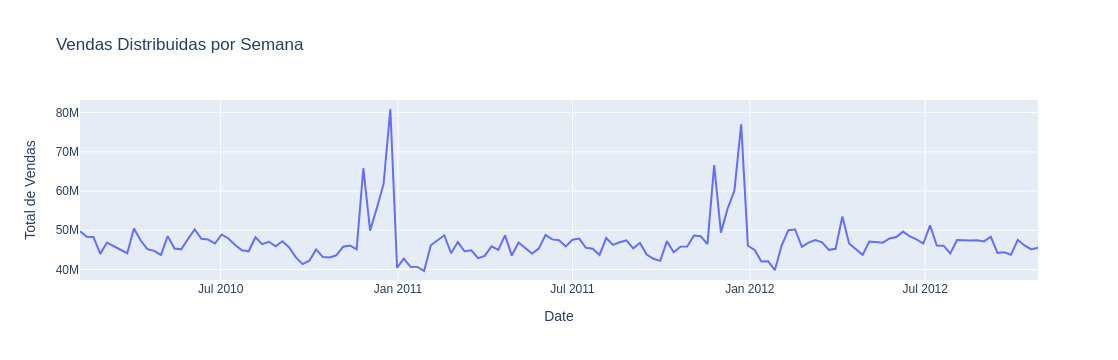

In [83]:
px.line(df_grupo, x='Date', y='Weekly_Sales',
        title='Vendas Distribuidas por Semana',
        labels={
        'Weekly_Sales': 'Total de Vendas',
        'Date': 'Date'
    })